## Chapter 08 딥러닝을 시작합니다 ▶️패션 럭키백을 판매합니다!
#### 08-3 합성곱 신경망의 시각화 ▶️신경망이 이미지에서 학습하는 게 무엇인지 이해하기

---
#### 1. 모형의 학습과정을 이해하기 위한 부분 
- 훈련 전/후의 weights를 시각화하여 비교해 보기 
- 단계별 훈련된 feature images를 출력하여 확인해보기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras 

In [2]:
## 앞서 만들었던 모델을 불러온다. 
model = keras.models.load_model('best-cnn-model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [3]:
## model.layer를 사용하여 각 레이어를 간단하게 출력 
model.layers

In [4]:
## 첫번째 레이어의 weights를 출력해보고, 이를 시각화 
print( model.layers[0].weights[0].shape )
print( model.layers[0].weights[1].shape )

(3, 3, 1, 32)
(32,)


In [5]:
print('훈련후 평균 =' , np.mean(model.layers[0].weights[0]))
print('훈련후 표준편차 =' , np.std(model.layers[0].weights[0]))

훈련후 평균 = -0.031208562
훈련후 표준편차 = 0.29678


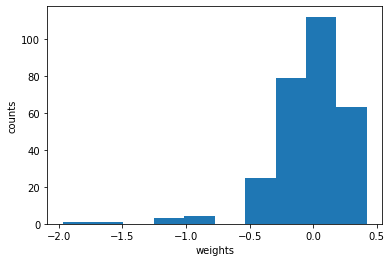

In [6]:
## 첫번째 레이어의 가중치를 넘파이 1차원 행렬로 변환하여 시각화  
plt.hist(model.layers[0].weights[0].numpy().reshape(-1,1))
plt.xlabel('weights')
plt.ylabel('counts')
plt.show()

In [7]:
## 훈련되기 전의 weights를 생성시켜 비교해 보자 
no_train_model = keras.Sequential()
no_train_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28,28,1)))

print('훈련전 평균 =' , np.mean(no_train_model.layers[0].weights[0]))
print('훈련전 표준편차 =' , np.std(no_train_model.layers[0].weights[0]))

훈련전 평균 = -0.0013578888
훈련전 표준편차 = 0.08349664


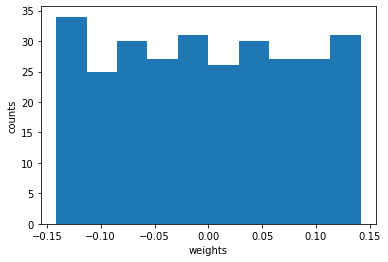

In [8]:
plt.hist(no_train_model.layers[0].weights[0].numpy().reshape(-1,1))
plt.xlabel('weights')
plt.ylabel('counts')
plt.show()

- 신경망이 초기 가중치 세팅시 균등 분포에서 랜덤하게 값을 선택하나, 훈련을 통해 입력값의 특성에 맞는 가중치로 변화하게 된다. 

----
#### 2. 함수형 API 
- Sequential() 클래스는 차례대로 레이어를 쌓는데 비해, 
- 함수형 api는 모델을 호출하고 input/output 값을 지정하는 방식으로 보다 복잡한 모델 구축에 용이하다. 

In [9]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [10]:
## input과 첫번째 레이어의 output을 사용해 새로운 모델 생성 
conv_acti = keras.Model(model.input, model.layers[0].output)
conv_acti.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


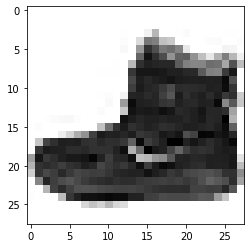

In [11]:
## 패선 mnist 데이터를 가져와 첫번째 이미지 출력하기 
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

- 아래 그림1은 첫단계의 학습결과. 그림2는 다음 단계의 학습결과임 
- 신경망의 후반부는 전단계에서 학습한 내용을 바탕으로 추상적인 정보를 학습하기 때문 

1/1 [==============================] - 0s 66ms/step
(1, 28, 28, 32)


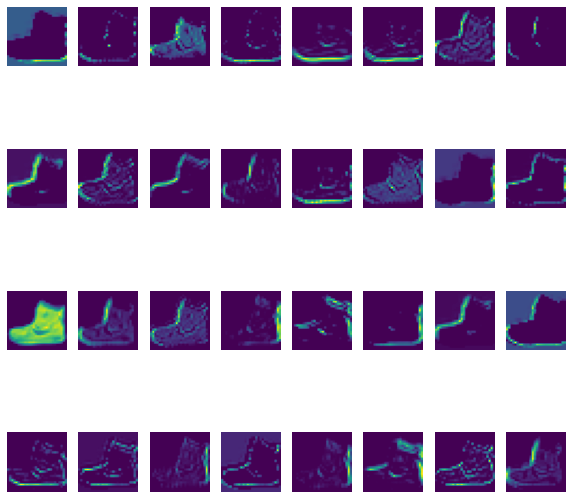

In [12]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

fig, axs = plt.subplots(4, 8, figsize=(10,10))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()

1/1 [==============================] - 0s 35ms/step
(1, 14, 14, 64)


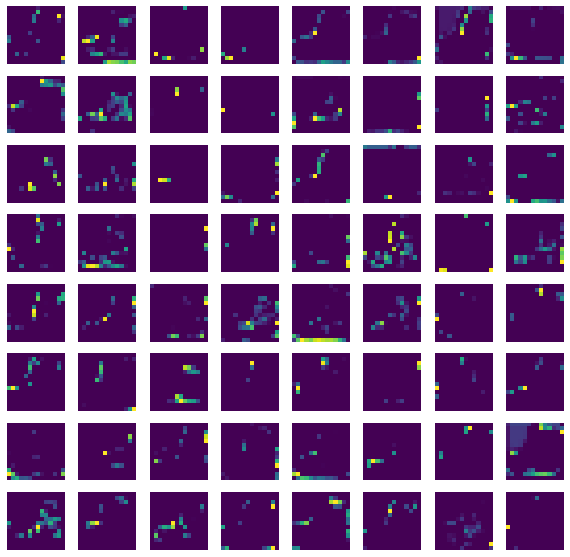

In [13]:
conv2_acti = keras.Model(model.input, model.layers[2].output)
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)
print(feature_maps.shape)

fig, axs = plt.subplots(8, 8, figsize=(10,10))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()